In [44]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="1"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/22_category/224/5k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 845.2834408283234 seconds


In [4]:
len(X_train)

88000

In [5]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/22_category/224/5k/X_validate.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/22_category/224/5k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/22_category/224/5k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/22_category/224/5k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/22_category/224/5k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 210.90929794311523 seconds


In [ ]:
# X_train = np.vstack((X_train_part1,X_train_part2,X_train_part3,X_train_part4,X_train_part5,X_train_part6,X_train_part7))

In [ ]:
# X_validate = np.vstack((X_validate_part1, X_validate_part2))

In [6]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (88000, 224, 224, 3)
88000 train samples
11000 validate samples
11000 test samples


In [7]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [14]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21       

In [15]:
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21    

In [16]:
for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21    

In [17]:
# one-hot encoder[only accpet int]
y_train=np_utils.to_categorical(Y_train,22)
y_validate=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 2.Model structure

In [46]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [47]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

In [48]:
from keras.callbacks import Callback
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3.Modeling

In [49]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
n_classes = 22
input_shape = 224,224,3

In [50]:
K.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [52]:
num_classes = 22
f1_metrics = Metrics()

In [53]:
hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping,f1_metrics],
    validation_data = (X_validate,y_validate))

Train on 88000 samples, validate on 11000 samples
Epoch 1/30
88000/88000 [==============================] - 409s 5ms/step - loss: 1.4538 - accuracy: 0.5178 - val_loss: 1.6099 - val_accuracy: 0.4446
val_f1: 0.4251 - val_precision: 0.5555 - val_recall: 0.4424
Epoch 2/30
88000/88000 [==============================] - 408s 5ms/step - loss: 0.9626 - accuracy: 0.6715 - val_loss: 1.2950 - val_accuracy: 0.5644
val_f1: 0.5637 - val_precision: 0.6264 - val_recall: 0.5652
Epoch 3/30
88000/88000 [==============================] - 408s 5ms/step - loss: 0.7596 - accuracy: 0.7385 - val_loss: 0.7757 - val_accuracy: 0.7357
val_f1: 0.7311 - val_precision: 0.7415 - val_recall: 0.7344
Epoch 4/30
88000/88000 [==============================] - 408s 5ms/step - loss: 0.6113 - accuracy: 0.7920 - val_loss: 1.2740 - val_accuracy: 0.5705
val_f1: 0.5592 - val_precision: 0.6441 - val_recall: 0.5707
Epoch 5/30
88000/88000 [==============================] - 408s 5ms/step - loss: 0.4934 - accuracy: 0.8331 - val_loss: 

In [30]:
# parallel_model.save('/home/zxt/data/model/alex_basic_5k_224.h5')

In [54]:
model.save('/home/zxt/data/model/22category/alex_basic_5k_224_model.h5')

### 4.Evaluation

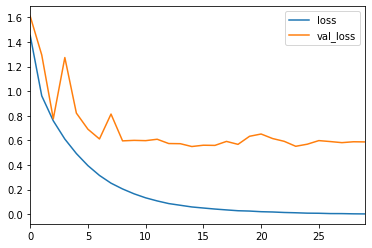

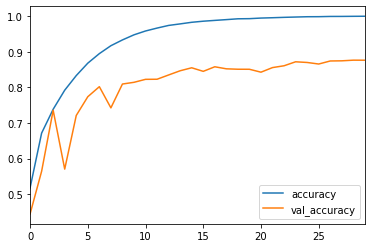

In [56]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [57]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

11000/11000 [==============================] - 30s 3ms/step

test loss 0.5714851094321771
accuracy 0.8818181753158569


In [58]:
y_pred = model.predict(X_test,batch_size=1)

In [59]:
y_pred

array([[2.12097371e-11, 1.96104634e-06, 1.65879268e-12, ...,
        1.21747107e-07, 1.37775729e-07, 1.61385360e-05],
       [2.82556189e-16, 1.04115785e-10, 2.79985513e-15, ...,
        6.69837963e-10, 2.11930269e-15, 1.35345669e-15],
       [1.03178397e-01, 3.04111445e-12, 4.38267962e-05, ...,
        6.61038735e-09, 2.47501575e-10, 2.56470812e-04],
       ...,
       [2.91945180e-03, 2.32942270e-08, 3.01505054e-07, ...,
        4.07548768e-08, 8.36885249e-12, 4.17542303e-12],
       [2.00133059e-06, 2.51893301e-14, 1.31395424e-07, ...,
        6.32455202e-16, 7.83224527e-12, 3.54174134e-12],
       [1.99071784e-03, 1.71902582e-06, 2.38246736e-04, ...,
        1.01439980e-07, 7.25726422e-05, 2.26718172e-01]], dtype=float32)

### 6.Check each categoryaccuracy

In [60]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [61]:
y_prediction[:5]

[9, 16, 18, 10, 4]

In [62]:
Y_test[:5]

array([['9'],
       ['16'],
       ['14'],
       ['10'],
       ['4']], dtype='<U16')

In [63]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [65]:
y_real.head(2)

,label
0,9
1,16


In [66]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [67]:

y_predict.head(2)

,label_pre
0,9
1,16


In [69]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [70]:
prediction_df

,label,label_pre,diff
0,9,9,0
1,16,16,0
2,14,18,-4
3,10,10,0
4,4,4,0
...,...,...,...
10995,1,1,0
10996,15,15,0
10997,18,18,0
10998,11,11,0


In [71]:
prediction_df.to_csv(r'/home/zxt/data/results/prediction_df.csv',index=False)

In [72]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','bobcat','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon','coyote']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'bobcat':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20,'coyote':21}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )

elephant acc:      0.855
wild_boar acc:      0.799
gazellethomosons acc:      0.950
squirrel acc:      0.924
hedgehog acc:      0.998
guineafowl acc:      0.962
moose acc:      0.991
bobcat acc:      0.683
bird acc:      0.877
fox acc:      0.839
giraffe acc:      0.921
buffalo acc:      0.868
hare acc:      0.971
vehicle acc:      0.911
wildebeest acc:      0.779
cattle acc:      0.778
skunk acc:      0.918
lion acc:      0.822
zebra acc:      0.848
black_bear acc:      0.861
racoon acc:      0.961
coyote acc:      0.891
